In [2]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import colorsys
import random
import os
from PIL import Image, ImageOps
from keras.utils import to_categorical

2024-11-28 14:33:37.951626: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-28 14:33:38.015052: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-28 14:33:38.672268: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense, Activation, Add, LeakyReLU
from keras.layers import Lambda, Conv2DTranspose, UpSampling2D, Reshape
from keras.models import Model
from keras.optimizers import Adam

In [4]:

inp_sh=(212,256,1)
inp0=Input(shape=(212,256,1))
inp1=Input(shape=(212,256,1))

x0=Conv2D(16,(3,3), padding='SAME')(inp0)
x0=BatchNormalization()(x0)
x0=Activation('relu')(x0)
x00=MaxPooling2D((2,2))(x0)

x0=Conv2D(32,(3,3), padding='SAME')(x00)
x0=BatchNormalization()(x0)
x0=Activation('relu')(x0)
x01=MaxPooling2D((2,2))(x0)

x0=Conv2D(64,(3,3), padding='SAME')(x01)
x0=BatchNormalization()(x0)
x0=Activation('relu')(x0)
x02=MaxPooling2D((2,2))(x0)

x0=Conv2D(128,(3,3), padding='SAME')(x02)
x0=BatchNormalization()(x0)
x0=Activation('relu')(x0)
x03=MaxPooling2D((2,2))(x0)


x1=Conv2D(16,(3,3), padding='SAME')(inp1)
x1=BatchNormalization()(x1)
x1=Activation('relu')(x1)
x10=MaxPooling2D((2,2))(x1)

x1=Conv2D(32,(3,3), padding='SAME')(x10)
x1=BatchNormalization()(x1)
x1=Activation('relu')(x1)
x11=MaxPooling2D((2,2))(x1)

x1=Conv2D(64,(3,3), padding='SAME')(x11)
x1=BatchNormalization()(x1)
x1=Activation('relu')(x1)
x12=MaxPooling2D((2,2))(x1)

x1=Conv2D(128,(3,3), padding='SAME')(x12)
x1=BatchNormalization()(x1)
x1=Activation('relu')(x1)
x13=MaxPooling2D((2,2))(x1)

#y1=Add()([x01,x11])
#y2=Add()([x02,x12])
x=Add()([x03,x13])




x2=UpSampling2D((2,2))(x)
x2=Conv2DTranspose(64,(3,3), padding='SAME')(x2)
x2=BatchNormalization()(x2)
x2=Activation('relu')(x2)

x2=UpSampling2D((2,2))(x2)
x2=Conv2DTranspose(32,(3,3), padding='SAME')(x2)
#x2=Conv2DTranspose(32,(3,1))(x2)
x2=BatchNormalization()(x2)
x2=Activation('relu')(x2)

x2=UpSampling2D((2,2))(x2)
x2=Conv2DTranspose(16,(3,3), padding='SAME')(x2)
x2=Conv2DTranspose(8,(3,1))(x2)
x2=BatchNormalization()(x2)
x2=Activation('relu')(x2)

x2=UpSampling2D((2,2))(x2)
x2=Conv2DTranspose(1,(3,3), padding='SAME')(x2)
#x2=BatchNormalization()(x2)
x2=Activation('sigmoid')(x2)




x3=UpSampling2D((2,2))(x)
x3=Conv2DTranspose(64,(3,3), padding='SAME')(x3)
x3=BatchNormalization()(x3)
x3=Activation('relu')(x3)

x3=UpSampling2D((2,2))(x3)
x3=Conv2DTranspose(32,(3,3), padding='SAME')(x3)
#x3=Conv2DTranspose(32,(3,1))(x3)
x3=BatchNormalization()(x3)
x3=Activation('relu')(x3)

x3=UpSampling2D((2,2))(x3)
x3=Conv2DTranspose(16,(3,3), padding='SAME')(x3)
x3=Conv2DTranspose(8,(3,1))(x3)
x3=BatchNormalization()(x3)
x3=Activation('relu')(x3)

x3=UpSampling2D((2,2))(x3)
x3=Conv2DTranspose(1,(3,3), padding='SAME')(x3)
#x3=Conv2DTranspose(3,(3,3), padding='SAME')(x3)
#x3=BatchNormalization()(x3)
x3=Activation('sigmoid')(x3)



gen_model=Model(inputs=[inp0, inp1], outputs=[x2, x3])
gen_model.compile(loss=['mse','mse'], optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False))


2024-11-28 14:33:45.365772: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1050 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:4b:00.0, compute capability: 8.6


In [5]:
gen_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 212, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 212, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 212, 256,  │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 212, 256,  │        160 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 212, 256,  │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 212, 256,  │         64 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 212, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 212, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 106, 128,  │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 106, 128,  │          0 │ activation_4[0][… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 106, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 106, 128,  │      4,640 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 106, 128,  │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 106, 128,  │        128 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 106, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 106, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 53, 64,    │          0 │ activation_1[0][

 Total params: 391,746 (1.49 MB)

 Trainable params: 390,370 (1.49 MB)

 Non-trainable params: 1,376 (5.38 KB)

In [6]:
inp0=Input(shape=(212,256,1))
inp1=Input(shape=(212,256,1))

def create_dscriminator():
    inp0=Input(shape=(212,256,1))
    x1=Conv2D(16,(3,3))(inp0)
    x1=LeakyReLU()(x1)
    x1=Conv2D(16,(3,3),strides=(2,2))(x1)
    x1=BatchNormalization()(x1)
    x1=LeakyReLU()(x1)
    x1=Conv2D(16,(3,3))(x1)
    x1=BatchNormalization()(x1)
    x1=LeakyReLU()(x1)
    x1=Conv2D(16,(3,3),strides=(2,2))(x1)
    x1=BatchNormalization()(x1)
    x1=LeakyReLU()(x1)
    x1=Conv2D(16,(3,3))(x1)
    x1=BatchNormalization()(x1)
    x1=LeakyReLU()(x1)
    x1=Conv2D(16,(3,3),strides=(2,2))(x1)
    x1=BatchNormalization()(x1)
    x1=LeakyReLU()(x1)
    x1=GlobalAveragePooling2D()(x1)
    x1=Dense(1,activation='sigmoid')(x1)

    model=Model(inputs=inp0, outputs=x1)
    model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
    return model

disc1= create_dscriminator()
disc2= create_dscriminator()

In [7]:
disc1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 212, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 210, 254, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 210, 254, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 104, 126, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 104, 126, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 104, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 102, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 102, 124, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 102, 124, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 50, 61, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 50, 61, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 50, 61, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 48, 59, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 48, 59, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 48, 59, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 23, 29, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 23, 29, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 23, 29, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,097 (47.25 KB)

 Trainable params: 11,937 (46.63 KB)

 Non-trainable params: 160 (640.00 B)

In [8]:
gen_model.outputs

[<KerasTensor shape=(None, 212, 256, 1), dtype=float32, sparse=False, name=keras_tensor_50>,
 <KerasTensor shape=(None, 212, 256, 1), dtype=float32, sparse=False, name=keras_tensor_66>]

In [9]:
[x1, x2]=gen_model([inp0,inp1])
d1=disc1(x1)
d2=disc2(x2)
#c=class_model([f1,f2,f3])
model=Model(inputs=[inp0, inp1], outputs=[x1,x2,d1,d2])
model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
              optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),
              metrics=['accuracy'])

In [ ]:
file_path = '/home/tripti/Single_modality_Slices/SWI/Train/AD/my_data.pkl'

# Open the pickle file in binary read mode and load the data
with open(file_path, 'rb') as file:
    data = pickle.load(file)

In [23]:
import glob
SWIAD=sorted(glob.glob('/home/tripti/Single_modality_Slices/SWI/Train/AD/*'))
SWICN=sorted(glob.glob('/home/tripti/Single_modality_Slices/SWI/Train/CN/*'))
TWIAD=sorted(glob.glob('/home/tripti/Single_modality_Slices/TWI/Train/AD/*'))
TWICN=sorted(glob.glob('/home/tripti/Single_modality_Slices/TWI/Train/CN/*'))

#SWIBT=sorted(glob.glob('/home/tripti/Data_slices/Sorted_BT_slices/Train/SWI/BT/Train/*'))
#SWIHC=sorted(glob.glob('/home/tripti/Data_slices/Sorted_BT_slices/Train/SWI/HC/Train/*'))
#FLABT=sorted(glob.glob('/home/tripti/Data_slices/Sorted_BT_slices/Train/Flair/BT/Train/*'))
#FLAHC=sorted(glob.glob('/home/tripti/Data_slices/Sorted_BT_slices/Train/Flair/HC/Train/*'))

In [1]:
import pickle

In [10]:
len(SWIAD)

1500

In [11]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 model (Functional)          [(None, 212, 256, 1),        391746    ['input_3[0][0]',             
                              (None, 212, 256, 1)]                   'input_4[0][0]']             
                                                                                                  
 model_1 (Functional)        (None, 1)                    12097     ['model[0][0]']         

In [ ]:
from PIL import Image, ImageOps
from keras.utils import to_categorical

b1=100
AD1=np.zeros((b1,212,256))
AD2=np.zeros((b1,212,256))
CN1=np.zeros((b1,212,256))
CN2=np.zeros((b1,212,256))


Ydisc=np.concatenate((np.ones(2*b1),np.zeros(2*b1)),axis=0)
Yclass=np.concatenate((np.zeros((b1,1)),np.ones((b1,1))),axis=0)
Ydisc1=np.ones((2*b1,1))

model.layers[2].trainable=True
model.layers[3].trainable=False
model.layers[4].trainable=False
model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
              optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])


for iter in range(0,80):
    print("epoch no:"+str(iter))
    model.layers[2].trainable=False
    model.layers[3].trainable=True
    model.layers[4].trainable=True
    model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
              optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
    
    for d_iter in range(0,3):
            
        for i in range(0,1400,b1):
            AD1=np.zeros((b1,212,256))
            AD2=np.zeros((b1,212,256))
            CN1=np.zeros((b1,212,256))
            CN2=np.zeros((b1,212,256))     
            for j in range(0,b1):
                AD1[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(SWIAD[i+j]).resize((256,212))))
                AD2[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(TWIAD[i+j]).resize((256,212))))
                CN1[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(SWICN[i+j]).resize((256,212))))
                CN2[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(TWICN[i+j]).resize((256,212))))
                

            AD1=np.expand_dims(AD1,axis=-1)
            AD2=np.expand_dims(AD2,axis=-1)
            CN1=np.expand_dims(CN1,axis=-1)
            CN2=np.expand_dims(CN2,axis=-1)
            
            X1=np.concatenate((AD1,CN1),axis=0)/255.0
            X2=np.concatenate((AD2,CN2),axis=0)/255.0
            Xgen=model.layers[2].predict([X1,X2])
            model.layers[3].fit(np.concatenate((X1,Xgen[0]),axis=0),Ydisc,shuffle=True)
            model.layers[4].fit(np.concatenate((X2,Xgen[1]),axis=0),Ydisc,shuffle=True)

    
    model.layers[2].trainable=True
    model.layers[3].trainable=False
    model.layers[4].trainable=False
    model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
              optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
    
    for gen_iter in range(0,5):
        for i in range(0,1400,b1):
            AD1=np.zeros((b1,212,256))
            AD2=np.zeros((b1,212,256))
            CN1=np.zeros((b1,212,256))
            CN2=np.zeros((b1,212,256))     
            for j in range(0,b1):
                AD1[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(SWIAD[i+j]).resize((256,212))))
                AD2[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(TWIAD[i+j]).resize((256,212))))
                CN1[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(SWICN[i+j]).resize((256,212))))
                CN2[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(TWICN[i+j]).resize((256,212))))

            AD1=np.expand_dims(AD1,axis=-1)
            AD2=np.expand_dims(AD2,axis=-1)
            CN1=np.expand_dims(CN1,axis=-1)
            CN2=np.expand_dims(CN2,axis=-1)
            
            X1=np.concatenate((AD1,CN1),axis=0)/255.0
            X2=np.concatenate((AD2,CN2),axis=0)/255.0
            model.fit([X1,X2],[X1,X2,Ydisc1,Ydisc1],batch_size=16,shuffle=True)

    model.save_weights('/home/tripti/SWI_TWI/2classes/GAN_weights/weight_'+str(iter)+'.h5')
   

epoch no:0
13/13 [==============================] - 1s 54ms/step - loss: 0.0210 - model_loss: 0.0094 - model_1_loss: 0.0084 - model_1_1_loss: 0.0017 - model_2_loss: 0.0015 - model_accuracy: 0.3976 - model_1_accuracy: 0.3747 - model_1_1_accuracy: 1.0000 - model_2_accuracy: 1.0000
epoch no:1
13/13 [==============================] - 1s 48ms/step - loss: 0.0215 - model_loss: 0.0079 - model_1_loss: 0.0084 - model_1_1_loss: 0.0042 - model_2_loss: 0.0011 - model_accuracy: 0.3976 - model_1_accuracy: 0.3747 - model_1_1_accuracy: 1.0000 - model_2_accuracy: 1.0000
epoch no:2
13/13 [==============================] - 1s 50ms/step - loss: 0.0195 - model_loss: 0.0073 - model_1_loss: 0.0096 - model_1_1_loss: 8.0229e-04 - model_2_loss: 0.0018 - model_accuracy: 0.3976 - model_1_accuracy: 0.3747 - model_1_1_accuracy: 1.0000 - model_2_accuracy: 1.0000
epoch no:3
13/13 [==============================] - 1s 46ms/step - loss: 0.0268 - model_loss: 0.0116 - model_1_loss: 0.0102 - model_1_1_loss: 0.0031 - model

In [24]:
import glob
SWIAD=sorted(glob.glob('/home/tripti/Single_modality_Slices/SWI/Train/AD/*'))
SWICN=sorted(glob.glob('/home/tripti/Single_modality_Slices/SWI/Train/CN/*'))
TWIAD=sorted(glob.glob('/home/tripti/Single_modality_Slices/TWI/Train/AD/*'))
TWICN=sorted(glob.glob('/home/tripti/Single_modality_Slices/TWI/Train/CN/*'))

In [28]:
len(TWICN)

1600

In [25]:
#### Feature extraction ####

model.layers[2].trainable=True
model.layers[3].trainable=False
model.layers[4].trainable=False
iter = 50
model.load_weights('/home/tripti/SWI_TWI/2classes/GAN_weights/weight_'+str(iter)+'.h5')
model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
              optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])

inp0=Input(shape=(212,256,1))
inp1=Input(shape=(212,256,1))
feat_gen = Model(inputs=model.layers[2].input, outputs = model.layers[2].layers[34].output)
feat_gen.trainable = False
feat_gen.compile(loss=['mse'], optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])



In [36]:
import scipy.io as scio
b1 = 115
count=0
Y = np.concatenate((np.ones((b1)),np.zeros((b1))),axis=0)
for i in range(0,230,b1):
    AD1=np.zeros((b1,212,256))
    AD2=np.zeros((b1,212,256))
    CN1=np.zeros((b1,212,256))
    CN2=np.zeros((b1,212,256))     
    for j in range(0,b1):
        AD1[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(SWIAD[i+j]).resize((256,212))))
        AD2[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(TWIAD[i+j]).resize((256,212))))
        CN1[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(SWICN[i+j]).resize((256,212))))
        CN2[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(TWICN[i+j]).resize((256,212))))
                

    AD1=np.expand_dims(AD1,axis=-1)
    AD2=np.expand_dims(AD2,axis=-1)
    CN1=np.expand_dims(CN1,axis=-1)
    CN2=np.expand_dims(CN2,axis=-1)
            
    X1=np.concatenate((AD1,CN1),axis=0)/255.0
    X2=np.concatenate((AD2,CN2),axis=0)/255.0
    
    f=feat_gen.predict([X1,X2])
    scio.savemat('test_features_'+str(count)+'.mat',{'feat':f, 'Y':Y})
    count=count+1

8/8 [==============================] - 0s 7ms/step


In [32]:
f.shape

(200, 13, 16, 128)

In [51]:
13*16*128+1

26625

In [50]:
94*95*3

26790

In [51]:
model.layers[2].trainable=True
model.layers[3].trainable=False
model.layers[4].trainable=False
iter = 50
model.load_weights('/home/tripti/SWI_TWI/2classes/GAN_weights/weight_'+str(iter)+'.h5')
model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
              optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])

inp0=Input(shape=(212,256,1))
inp1=Input(shape=(212,256,1))
feat_gen = Model(inputs=model.layers[2].input, outputs = model.layers[2].layers[34].output)
feat_gen.trainable = False
feat_gen.compile(loss=['mse'], optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])


x=feat_gen([inp0,inp1])
x=Conv2D(128,(3,3),padding='SAME', activation='relu')(x)
x=Conv2D(256,(3,3),padding='SAME', activation='relu')(x)
x=Conv2D(512,(3,3),padding='SAME', activation='relu')(x)
x=GlobalAveragePooling2D()(x)
#x=Dense(1024, activation='relu')(x)
x=Dense(512, activation='relu')(x)
#x=Dense(256, activation='relu')(x)
x=Dense(1, activation='sigmoid')(x)
m1=Model(inputs=[inp0, inp1], outputs=x)
m1.compile(loss='binary_crossentropy',
           optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
m1.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_21 (InputLayer)       [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 input_22 (InputLayer)       [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 model_18 (Functional)       (None, 13, 16, 128)          196224    ['input_21[0][0]',            
                                                                     'input_22[0][0]']            
                                                                                                  
 conv2d_41 (Conv2D)          (None, 13, 16, 128)          147584    ['model_18[0][0]']     

In [52]:
b1=100
AD1=np.zeros((b1,212,256))
AD2=np.zeros((b1,212,256))
CN1=np.zeros((b1,212,256))
CN2=np.zeros((b1,212,256))
Y0 = np.zeros((b1,1))
Y1 = np.ones((b1,1))

for iter in range(0,50):
        print('epoch: '+str(iter))  
        for i in range(0,1500,b1):
            AD1=np.zeros((b1,212,256))
            AD2=np.zeros((b1,212,256))
            CN1=np.zeros((b1,212,256))
            CN2=np.zeros((b1,212,256))     
            for j in range(0,b1):
                AD1[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(SWIAD[i+j]).resize((256,212))))
                AD2[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(TWIAD[i+j]).resize((256,212))))
                CN1[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(SWICN[i+j]).resize((256,212))))
                CN2[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(TWICN[i+j]).resize((256,212))))
                

            AD1=np.expand_dims(AD1,axis=-1)
            AD2=np.expand_dims(AD2,axis=-1)
            CN1=np.expand_dims(CN1,axis=-1)
            CN2=np.expand_dims(CN2,axis=-1)
            
            X1=np.concatenate((AD1,CN1),axis=0)/255.0
            X2=np.concatenate((AD2,CN2),axis=0)/255.0
            
            m1.fit([X1,X2],np.concatenate((Y1,Y0),axis=0),batch_size=16,shuffle=True)   
            
        m1.save_weights('/home/tripti/SWI_TWI/2classes/class_weights_50/weight_'+str(iter)+'.h5')

epoch: 0
13/13 [==============================] - 0s 13ms/step - loss: 0.6686 - accuracy: 0.6150
epoch: 1
13/13 [==============================] - 0s 15ms/step - loss: 0.5660 - accuracy: 0.7100
epoch: 2
13/13 [==============================] - 0s 15ms/step - loss: 0.5339 - accuracy: 0.7550
epoch: 3
13/13 [==============================] - 0s 15ms/step - loss: 0.5299 - accuracy: 0.7750
epoch: 4
13/13 [==============================] - 0s 14ms/step - loss: 0.4904 - accuracy: 0.7950
epoch: 5
13/13 [==============================] - 0s 14ms/step - loss: 0.5045 - accuracy: 0.7900
epoch: 6
13/13 [==============================] - 0s 14ms/step - loss: 0.4378 - accuracy: 0.8200
epoch: 7
13/13 [==============================] - 0s 14ms/step - loss: 0.4516 - accuracy: 0.7650
epoch: 8
13/13 [==============================] - 0s 13ms/step - loss: 0.4586 - accuracy: 0.8300
epoch: 9
13/13 [==============================] - 0s 13ms/step - loss: 0.4434 - accuracy: 0.8400
epoch: 10
13/13 [=============

In [33]:
import glob
SWIAD=sorted(glob.glob('/home/tripti/Single_modality_Slices/SWI/Test/AD/*'))
SWICN=sorted(glob.glob('/home/tripti/Single_modality_Slices/SWI/Test/CN/*'))
TWIAD=sorted(glob.glob('/home/tripti/Single_modality_Slices/TWI/Test/AD/*'))
TWICN=sorted(glob.glob('/home/tripti/Single_modality_Slices/TWI/Test/CN/*'))


In [35]:
len(SWICN)

400

In [55]:
### 20 ----
### 30 ---- 97.16666%
### 40 ---- 97.0%
### 50 ---- 96.666% 

b1 = 230
i=0
Y0 = np.zeros((b1,1))
Y1 = np.ones((b1,1))
Y = np.concatenate((Y1,Y0),axis=0)

for iter in range(0,50):
    m1.load_weights('/home/tripti/SWI_TWI/2classes/class_weights_50/weight_'+str(iter)+'.h5')
    m1.compile(loss='binary_crossentropy',
           optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])

    AD1=np.zeros((b1,212,256))
    AD2=np.zeros((b1,212,256))
    CN1=np.zeros((b1,212,256))
    CN2=np.zeros((b1,212,256))     
    for j in range(0,b1):
        AD1[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(SWIAD[i+j]).resize((256,212))))
        AD2[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(TWIAD[i+j]).resize((256,212))))
        CN1[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(SWICN[i+j]).resize((256,212))))
        CN2[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(TWICN[i+j]).resize((256,212))))
                

    AD1=np.expand_dims(AD1,axis=-1)
    AD2=np.expand_dims(AD2,axis=-1)
    CN1=np.expand_dims(CN1,axis=-1)
    CN2=np.expand_dims(CN2,axis=-1)
            
    X1=np.concatenate((AD1,CN1),axis=0)/255.0
    X2=np.concatenate((AD2,CN2),axis=0)/255.0
    
    y_pred=m1.predict([X1,X2])
    acc=np.mean(np.round(y_pred)==Y)*100
    print(f'epoch: {iter}; accuracy= {acc}%')

15/15 [==============================] - 0s 10ms/step
epoch: 0; accuracy= 52.391304347826086%
15/15 [==============================] - 0s 10ms/step
epoch: 1; accuracy= 76.52173913043478%
15/15 [==============================] - 0s 10ms/step
epoch: 2; accuracy= 77.6086956521739%
15/15 [==============================] - 0s 9ms/step
epoch: 3; accuracy= 75.43478260869566%
15/15 [==============================] - 0s 10ms/step
epoch: 4; accuracy= 78.47826086956522%
15/15 [==============================] - 0s 9ms/step
epoch: 5; accuracy= 77.6086956521739%
15/15 [==============================] - 0s 10ms/step
epoch: 6; accuracy= 70.86956521739131%
15/15 [==============================] - 0s 10ms/step
epoch: 7; accuracy= 76.52173913043478%
15/15 [==============================] - 0s 10ms/step
epoch: 8; accuracy= 78.26086956521739%
15/15 [==============================] - 0s 9ms/step
epoch: 9; accuracy= 74.56521739130434%
15/15 [==============================] - 0s 11ms/step
epoch: 10; accuracy=

In [52]:
m1.load_weights('/home/tripti/Shradha/SWI_FLA/2classes/class_weights_30/weight_14.h5')
m1.compile(loss='binary_crossentropy',
           optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
y_pred = m1.predict([hc1/255, hc2/255])
np.round(y_pred)

2/2 [==============================] - 0s 9ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [48]:
iter=8
m1.load_weights('/home/tripti/Shradha/SWI_FLA/2classes/class_weights_30/weight_'+str(iter)+'.h5')
m1.compile(loss='binary_crossentropy',
           optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
b1 = 100

bt1=np.zeros((b1,212,256))
bt2=np.zeros((b1,212,256))
hc1=np.zeros((b1,212,256))
hc2=np.zeros((b1,212,256))     
Y0 = np.zeros((b1,1))
Y1 = np.ones((b1,1))
Y = np.concatenate((Y1,Y0),axis=0)


for j in range(0,b1):
    bt1[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(SWIBT1[i+j]).resize((256,212))))
    bt2[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(FLABT1[i+j]).resize((256,212))))
    hc1[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(SWIHC[i+j]).resize((256,212))))
    hc2[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(FLAHC[i+j]).resize((256,212))))                
bt1=np.expand_dims(bt1,axis=-1)
bt2=np.expand_dims(bt2,axis=-1)
hc1=np.expand_dims(hc1,axis=-1)
hc2=np.expand_dims(hc2,axis=-1)
                
X1=np.concatenate((bt1,hc1),axis=0)/255.0
X2=np.concatenate((bt2,hc2),axis=0)/255.0
    
y_pred=m1.predict([X1,X2])

7/7 [==============================] - 0s 10ms/step


In [50]:
np.sum(np.round(y_pred)==Y)

200

In [63]:
SWIBT1=sorted(glob.glob('/home/tripti/Data_slices/Test_1sub_30oct/SWI_demo/BT/*'))
FLABT1=sorted(glob.glob('/home/tripti/Data_slices/Test_1sub_30oct/FLA_demo/BT/*'))
SWIHC1=sorted(glob.glob('/home/tripti/Data_slices/Test_1sub_30oct/SWI_demo/HC/*'))
FLAHC1=sorted(glob.glob('/home/tripti/Data_slices/Test_1sub_30oct/FLA_demo/HC/*'))

In [78]:
len(SWIBT1)

106

In [85]:
### 20 ----
### 30 ---- 97.16666%
### 40 ---- 97.0%
### 50 ---- 96.666% 

b1=len(SWIBT1)
i=0
iter=14
m1.load_weights('/home/tripti/Shradha/SWI_FLA/2classes/class_weights_30/weight_'+str(iter)+'.h5')
m1.compile(loss='binary_crossentropy',
           optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])

#bt1=np.zeros((b1,212,256))
#bt2=np.zeros((b1,212,256))
    #hc1=np.zeros((b1,212,256))
    #hc2=np.zeros((b1,212,256))     
Y = np.zeros((b1,1))
#Y1 = np.ones((b1,1))
#Y = np.concatenate((Y1,Y0),axis=0)

for j in range(b1):
    bt1=np.asarray(ImageOps.grayscale(Image.open(SWIBT1[i+j]).resize((256,212))))
    bt2=np.asarray(ImageOps.grayscale(Image.open(FLABT1[i+j]).resize((256,212))))
                        
    bt1=np.expand_dims(np.expand_dims(bt1,axis=-1),axis=0)
    bt2=np.expand_dims(np.expand_dims(bt2,axis=-1),axis=0)
                    
    #X1=np.concatenate((bt1),axis=0)/255.0
    #X2=np.concatenate((bt2),axis=0)/255.0
    
    Y[j,0]=m1.predict([bt1/255,bt2/255])
    

1/1 [==============================] - 0s 29ms/step


/tmp/ipykernel_2239436/2558560833.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[j,0]=m1.predict([bt1/255,bt2/255])


1/1 [==============================] - 0s 29ms/step


In [87]:
np.round(Y)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [14]:
from keras.layers import Flatten
model.layers[2].trainable=True
model.layers[3].trainable=False
model.layers[4].trainable=False
model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
             optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
model.load_weights('/home/user/Chandrajit/Information_fusion/4classes/GAN_weights/weight_50.h5')
m0=Model(inputs=model.layers[2].input, outputs=Flatten()(model.layers[2].layers[34].output))
m0.summary()

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/user/Chandrajit/Information_fusion/4classes/GAN_weights/weight_50.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [18]:
from PIL import Image, ImageOps
from keras.utils import to_categorical
import scipy.io as scio
import numpy as np

b1=200
ad11=np.zeros((b1,212,256))
ad21=np.zeros((b1,212,256))
cn11=np.zeros((b1,212,256))
cn21=np.zeros((b1,212,256))
mc11=np.zeros((b1,212,256))
mc21=np.zeros((b1,212,256))
smc11=np.zeros((b1,212,256))
smc21=np.zeros((b1,212,256))

Yclass=np.concatenate((np.zeros((b1,1)),np.ones((b1,1)),np.ones((b1,1))*2,np.ones((b1,1))*3),axis=0)

count=0
for i in range(0,1000,b1):
    for j in range(0,b1):
        ad11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIAD[i+j]).resize((256,212))))
        ad21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETAD[i+j]).resize((256,212))))
        cn11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRICN[i+j]).resize((256,212))))
        cn21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETCN[i+j]).resize((256,212))))
        mc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIMCI[i+j]).resize((256,212))))
        mc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETMCI[i+j]).resize((256,212))))
        smc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRISMC[i+j]).resize((256,212))))
        smc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETSMC[i+j]).resize((256,212))))

    ad1=np.expand_dims(ad11,axis=-1)
    ad2=np.expand_dims(ad21,axis=-1)
    cn1=np.expand_dims(cn11,axis=-1)
    cn2=np.expand_dims(cn21,axis=-1)
    mc1=np.expand_dims(mc11,axis=-1)
    mc2=np.expand_dims(mc21,axis=-1)
    smc1=np.expand_dims(smc11,axis=-1)
    smc2=np.expand_dims(smc21,axis=-1)
            
    X1=np.concatenate((ad1,cn1,mc1,smc1),axis=0)/255.0
    X2=np.concatenate((ad2,cn2,mc2,smc2),axis=0)/255.0
    X=m0.predict([X1,X2])
    
    scio.savemat(f'feature_map{count}.mat',{'X':X, 'Y':Yclass})
    count=count+1
    print(count)

2024-03-01 12:52:33.517185: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905


25/25 [==============================] - 4s 7ms/step
1
25/25 [==============================] - 0s 7ms/step
2
25/25 [==============================] - 0s 7ms/step
3
25/25 [==============================] - 0s 7ms/step
4
25/25 [==============================] - 0s 7ms/step
5


In [62]:
from keras.layers import Flatten
model.layers[2].trainable=True
model.layers[3].trainable=False
model.layers[4].trainable=False
model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
             optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
model.load_weights('/home/user/Chandrajit/Information_fusion/4classes/GAN_weights/weight_50.h5')
m0=Model(inputs=model.layers[2].input, outputs=model.layers[2].layers[34].output)
m0.trainable=False

x=m0([inp0,inp1])
x=Conv2D(128,(3,3),padding='SAME', activation='relu')(x)
x=Conv2D(256,(3,3),padding='SAME', activation='relu')(x)
x=Conv2D(512,(3,3),padding='SAME', activation='relu')(x)
x=GlobalAveragePooling2D()(x)
#x=Dense(1024, activation='relu')(x)
x=Dense(512, activation='relu')(x)
#x=Dense(256, activation='relu')(x)
x=Dense(4, activation='softmax')(x)
m1=Model(inputs=[inp0, inp1], outputs=x)
m1.compile(loss='categorical_crossentropy',
           optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
m1.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 model_17 (Functional)       (None, 13, 16, 128)          196224    ['input_9[0][0]',             
                                                                     'input_10[0][0]']            
                                                                                                  
 conv2d_52 (Conv2D)          (None, 13, 16, 128)          147584    ['model_17[0][0]']     

In [63]:


b1=300
ad11=np.zeros((b1,212,256))
ad21=np.zeros((b1,212,256))
cn11=np.zeros((b1,212,256))
cn21=np.zeros((b1,212,256))
mc11=np.zeros((b1,212,256))
mc21=np.zeros((b1,212,256))
smc11=np.zeros((b1,212,256))
smc21=np.zeros((b1,212,256))

Yclass=np.concatenate((np.zeros((b1,1)),np.ones((b1,1)),np.ones((b1,1))*2,np.ones((b1,1))*3),axis=0)


for iter in range(0,40):
    print("epoch no:"+str(iter))
    for i in range(0,800,b1):
        for j in range(0,b1):
                ad11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIAD[i+j]).resize((256,212))))
                ad21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETAD[i+j]).resize((256,212))))
                cn11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRICN[i+j]).resize((256,212))))
                cn21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETCN[i+j]).resize((256,212))))
                mc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIMCI[i+j]).resize((256,212))))
                mc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETMCI[i+j]).resize((256,212))))
                smc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRISMC[i+j]).resize((256,212))))
                smc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETSMC[i+j]).resize((256,212))))

        ad1=np.expand_dims(ad11,axis=-1)
        ad2=np.expand_dims(ad21,axis=-1)
        cn1=np.expand_dims(cn11,axis=-1)
        cn2=np.expand_dims(cn21,axis=-1)
        mc1=np.expand_dims(mc11,axis=-1)
        mc2=np.expand_dims(mc21,axis=-1)
        smc1=np.expand_dims(smc11,axis=-1)
        smc2=np.expand_dims(smc21,axis=-1)
            
        X1=np.concatenate((ad1,cn1,mc1,smc1),axis=0)/255.0
        X2=np.concatenate((ad2,cn2,mc2,smc2),axis=0)/255.0
        m1.fit([X1,X2], to_categorical(Yclass), shuffle=True, batch_size=16)
        #model.layers[4].fit(np.concatenate((X2,Xgen[1]),axis=0),Ydisc,shuffle=True)
    m1.save_weights('/home/user/Chandrajit/Information_fusion/4classes/GAN_weights/class59/weight_'+str(iter)+'.h5')

epoch no:0
75/75 [==============================] - 1s 10ms/step - loss: 0.8141 - accuracy: 0.5575
epoch no:1
75/75 [==============================] - 1s 10ms/step - loss: 0.7480 - accuracy: 0.6167
epoch no:2
75/75 [==============================] - 1s 9ms/step - loss: 0.6419 - accuracy: 0.6850
epoch no:3
75/75 [==============================] - 1s 10ms/step - loss: 0.5059 - accuracy: 0.7842
epoch no:4
75/75 [==============================] - 1s 11ms/step - loss: 0.4342 - accuracy: 0.8108
epoch no:5
75/75 [==============================] - 1s 10ms/step - loss: 0.3243 - accuracy: 0.8775
epoch no:6
75/75 [==============================] - 1s 10ms/step - loss: 0.2930 - accuracy: 0.8917
epoch no:7
75/75 [==============================] - 1s 10ms/step - loss: 0.2256 - accuracy: 0.9225
epoch no:8
75/75 [==============================] - 1s 11ms/step - loss: 0.1875 - accuracy: 0.9308
epoch no:9
75/75 [==============================] - 1s 11ms/step - loss: 0.1369 - accuracy: 0.9575
epoch no:10

In [64]:
b1=100
Ypred=np.zeros(4*200)
Ydes=np.zeros(4*200)
Y1=np.zeros(b1)
Y2=np.ones(b1)
Y3=np.ones(b1)*2
Y4=np.ones(b1)*3

Y0=np.concatenate((Y1,Y2,Y3,Y4),axis=0)

count=0
ad11=np.zeros((b1,212,256))
ad21=np.zeros((b1,212,256))
cn11=np.zeros((b1,212,256))
cn21=np.zeros((b1,212,256))
mc11=np.zeros((b1,212,256))
mc21=np.zeros((b1,212,256))
smc11=np.zeros((b1,212,256))
smc21=np.zeros((b1,212,256))

ad1 = np.zeros((b1,212,256,1))
ad2= np.zeros((b1,212,256,1))
cn1= np.zeros((b1,212,256,1))
cn2= np.zeros((b1,212,256,1))
mc1= np.zeros((b1,212,256,1))
mc2 = np.zeros((b1,212,256,1))
smc1= np.zeros((b1,212,256,1))
smc2 = np.zeros((b1,212,256,1))

for iter in range(0, 40):
    m1.load_weights('/home/user/Chandrajit/Information_fusion/4classes/GAN_weights/class59/weight_'+str(iter)+'.h5')
    print('epoch: '+str(iter))
    count=0
    for i in range(800,1000,b1):
            for j in range(0,b1):
                    ad11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIAD[i+j]).resize((256,212))))
                    ad21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETAD[i+j]).resize((256,212))))
                    cn11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRICN[i+j]).resize((256,212))))
                    cn21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETCN[i+j]).resize((256,212))))
                    mc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIMCI[i+j]).resize((256,212))))
                    mc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETMCI[i+j]).resize((256,212))))
                    smc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRISMC[i+j]).resize((256,212))))
                    smc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETSMC[i+j]).resize((256,212))))

    
            ad1=np.expand_dims(ad11,axis=-1)
            ad2=np.expand_dims(ad21,axis=-1)
            cn1=np.expand_dims(cn11,axis=-1)
            cn2=np.expand_dims(cn21,axis=-1)
            mc1=np.expand_dims(mc11,axis=-1)
            mc2=np.expand_dims(mc21,axis=-1)
            smc1=np.expand_dims(smc11,axis=-1)
            smc2=np.expand_dims(smc21,axis=-1)
                
            X1=np.concatenate((ad1,cn1,mc1,smc1),axis=0)/255.0
            X2=np.concatenate((ad2,cn2,mc2,smc2),axis=0)/255.0
            Y=m1.predict([X1,X2])
            Ydes[count:count+4*b1]=Y0
            Ypred[count:count+4*b1]=np.argmax(Y,axis=1)
            count=count+4*b1
    
    print(sum(Ydes==Ypred)/len(Ydes))

epoch: 0
13/13 [==============================] - 0s 9ms/step
0.60125
epoch: 1
13/13 [==============================] - 0s 8ms/step
0.535
epoch: 2
13/13 [==============================] - 0s 9ms/step
0.72125
epoch: 3
13/13 [==============================] - 0s 9ms/step
0.67375
epoch: 4
13/13 [==============================] - 0s 8ms/step
0.8975
epoch: 5
13/13 [==============================] - 0s 8ms/step
0.90125
epoch: 6
13/13 [==============================] - 0s 8ms/step
0.7975
epoch: 7
13/13 [==============================] - 0s 8ms/step
0.86125
epoch: 8
13/13 [==============================] - 0s 8ms/step
0.915
epoch: 9
13/13 [==============================] - 0s 9ms/step
0.9375
epoch: 10
13/13 [==============================] - 0s 8ms/step
0.9225
epoch: 11
13/13 [==============================] - 0s 8ms/step
0.945
epoch: 12
13/13 [==============================] - 0s 9ms/step
0.9
epoch: 13
13/13 [==============================] - 0s 9ms/step
0.9325
epoch: 14
13/13 [==============

In [48]:
count

800

In [76]:
from PIL import Image, ImageOps
from keras.utils import to_categorical
import time

b1=100
Ypred=np.zeros(4*200)
Ydes=np.zeros(4*200)
Y1=np.zeros(b1)
Y2=np.ones(b1)
Y3=np.ones(b1)*2
Y4=np.ones(b1)*3

Y0=np.concatenate((Y1,Y2,Y3,Y4),axis=0)

count=0
ad11=np.zeros((b1,212,256))
ad21=np.zeros((b1,212,256))
cn11=np.zeros((b1,212,256))
cn21=np.zeros((b1,212,256))
mc11=np.zeros((b1,212,256))
mc21=np.zeros((b1,212,256))
smc11=np.zeros((b1,212,256))
smc21=np.zeros((b1,212,256))

ad1 = np.zeros((b1,212,256,1))
ad2= np.zeros((b1,212,256,1))
cn1= np.zeros((b1,212,256,1))
cn2= np.zeros((b1,212,256,1))
mc1= np.zeros((b1,212,256,1))
mc2 = np.zeros((b1,212,256,1))
smc1= np.zeros((b1,212,256,1))
smc2 = np.zeros((b1,212,256,1))

iter=11

m1.load_weights('/home/user/Chandrajit/Information_fusion/4classes/GAN_weights/class59/weight_'+str(iter)+'.h5')
print('epoch: '+str(iter))
start_time=time.time()
for i in range(800,1000,b1):
            for j in range(0,b1):
                
                    ad11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIAD[i+j]).resize((256,212))))
                    ad21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETAD[i+j]).resize((256,212))))
                    cn11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRICN[i+j]).resize((256,212))))
                    cn21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETCN[i+j]).resize((256,212))))
                    mc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIMCI[i+j]).resize((256,212))))
                    mc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETMCI[i+j]).resize((256,212))))
                    smc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRISMC[i+j]).resize((256,212))))
                    smc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETSMC[i+j]).resize((256,212))))
    
            ad1=np.expand_dims(ad11,axis=-1)
            ad2=np.expand_dims(ad21,axis=-1)
            cn1=np.expand_dims(cn11,axis=-1)
            cn2=np.expand_dims(cn21,axis=-1)
            mc1=np.expand_dims(mc11,axis=-1)
            mc2=np.expand_dims(mc21,axis=-1)
            smc1=np.expand_dims(smc11,axis=-1)
            smc2=np.expand_dims(smc21,axis=-1)
                
            X1=np.concatenate((ad1,cn1,mc1,smc1),axis=0)/255.0
            X2=np.concatenate((ad2,cn2,mc2,smc2),axis=0)/255.0
            
            Y=m1.predict([X1,X2])
            Ydes[count:count+4*b1]=Y0
            Ypred[count:count+4*b1]=np.argmax(Y,axis=1)
            count=count+4*b1
end_time=time.time()  
print('time taken: '+str(end_time-start_time))
print('fps: '+str(800/(end_time-start_time)))
print('time taken per image: '+str((end_time-start_time)/800))
print(sum(Ydes==Ypred)/len(Ydes))

epoch: 11
13/13 [==============================] - 0s 8ms/step
time taken: 2.601916551589966
fps: 307.46566392036675
time taken per image: 0.003252395689487457
0.945


In [75]:
Ydes.shape

(600,)

In [77]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(Ydes, Ypred)
print(result)

[[161  33   6   0]
 [  5 195   0   0]
 [  0   0 200   0]
 [  0   0   0 200]]


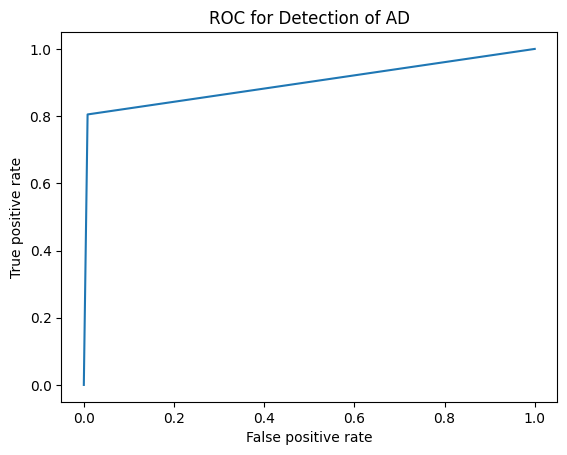

In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Ydes0=(Ydes==0)
Ydes0.astype('int')

Ypred0=(Ypred==0)
Ypred0.astype('int')

fpr_keras, tpr_keras, thresholds_keras = roc_curve(Ydes0, Ypred0)
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC for Detection of AD')
plt.savefig('ROC_AD.eps', format='eps')

In [85]:
auc_keras

0.8983333333333334

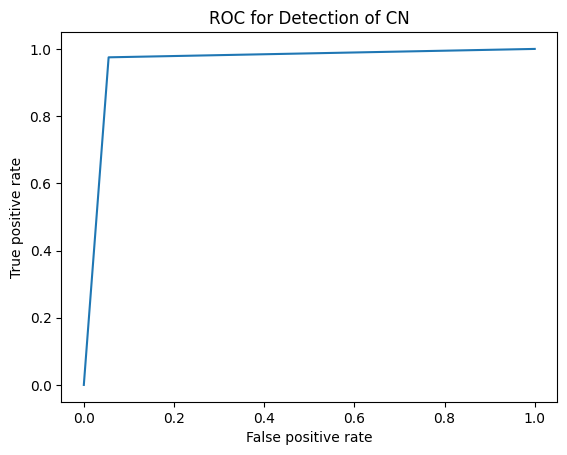

In [86]:
Ydes0=(Ydes==1)
Ydes0.astype('int')

Ypred0=(Ypred==1)
Ypred0.astype('int')

fpr_keras, tpr_keras, thresholds_keras = roc_curve(Ydes0, Ypred0)
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC for Detection of CN')
plt.savefig('ROC_CN.eps', format='eps')

In [87]:
auc_keras

0.96

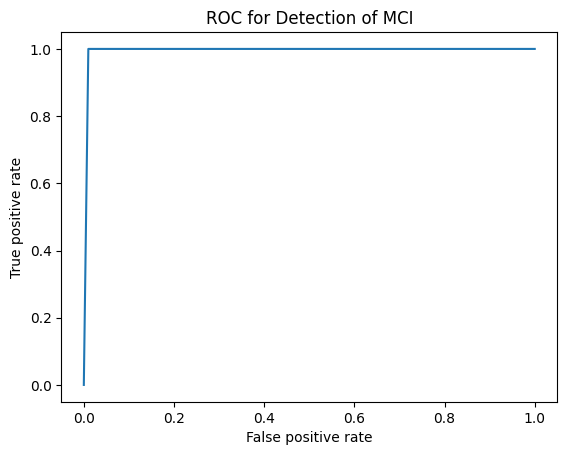

In [88]:
Ydes0=(Ydes==2)
Ydes0.astype('int')

Ypred0=(Ypred==2)
Ypred0.astype('int')

fpr_keras, tpr_keras, thresholds_keras = roc_curve(Ydes0, Ypred0)
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC for Detection of MCI')
plt.savefig('ROC_MCI.eps', format='eps')

In [89]:
auc_keras

0.995

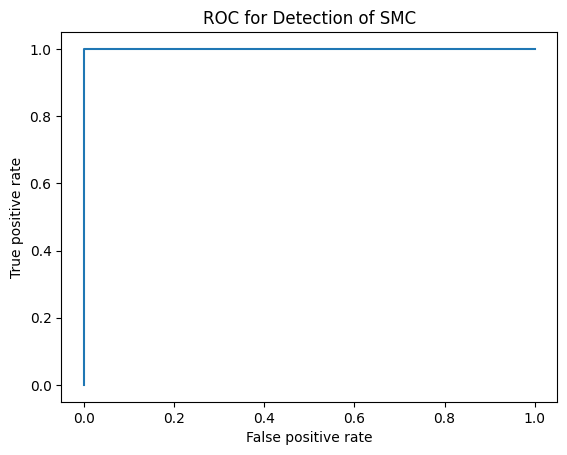

In [90]:
Ydes0=(Ydes==3)
Ydes0.astype('int')

Ypred0=(Ypred==3)
Ypred0.astype('int')

fpr_keras, tpr_keras, thresholds_keras = roc_curve(Ydes0, Ypred0)
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC for Detection of SMC')
plt.savefig('ROC_SMC.eps', format='eps')

In [91]:
auc_keras

1.0

In [83]:
from sklearn.metrics import classification_report
print(classification_report(Ydes, Ypred))

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       200
         1.0       0.86      0.97      0.91       200
         2.0       0.97      1.00      0.99       200
         3.0       1.00      1.00      1.00       200

    accuracy                           0.94       800
   macro avg       0.95      0.95      0.94       800
weighted avg       0.95      0.94      0.94       800



In [ ]:
j

In [ ]:
import scipy.io as scio
scio.savemat('/home/user/Chandrajit/Information_fusion/Y.mat',{'Ydes':Ydes, 'Ypred':Ypred})

In [ ]:
mat=scio.loadmat('/home/user/Chandrajit/Information_fusion/Y.mat')

In [ ]:
len(Ypred)

In [33]:
model.load_weights('/home/user/Chandrajit/Information_fusion/GAN_weights3/weight_23.h5')
op=model.layers[2]([inp0,inp1])
op1=model.layers[5]([op[3],op[4],op[2]])
m0=Model(inputs=[inp0,inp1], outputs=op1)

Y1=np.zeros(b1)
Y2=np.ones(b1)
Y3=np.ones(b1)*2

Y0=np.concatenate((Y1,Y2,Y3),axis=0)

Ypred=np.zeros(3*200)
Ydes=np.zeros(3*200)
count=0
for i in range(800,1000,b1):
            
            for j in range(0,b1):
                ad11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIAD[i+j]).resize((256,212))))
                ad21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETAD[i+j]).resize((256,212))))
                cn11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRICN[i+j]).resize((256,212))))
                cn21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETCN[i+j]).resize((256,212))))
                mc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIMCI[i+j]).resize((256,212))))
                mc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETMCI[i+j]).resize((256,212))))

            ad1=np.expand_dims(ad11,axis=-1)
            ad2=np.expand_dims(ad21,axis=-1)
            cn1=np.expand_dims(cn11,axis=-1)
            cn2=np.expand_dims(cn21,axis=-1)
            mc1=np.expand_dims(mc11,axis=-1)
            mc2=np.expand_dims(mc21,axis=-1)
            
            X1=np.concatenate((ad1,cn1,mc1),axis=0)
            X2=np.concatenate((ad2,cn2,mc2),axis=0)
            Y= m0.predict([X1,X2])
            Ydes[count:count+3*b1]=Y0
            Ypred[count:count+3*b1]=np.argmax(Y,axis=1)
            count=count+3*b1

sum(Ydes==Ypred)/len(Ydes)

10/10 [==============================] - 0s 13ms/step


0.5283333333333333

0.5316666666666666

In [24]:
m0.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 model (Functional)          [(None, 212, 256, 1),        17302     ['input_6[0][0]',             
                              (None, 212, 256, 1),                   'input_7[0][0]']             
                              (None, 26, 32, 16),                                                 
                              (None, 106, 128, 16),                                         